Example based on https://www.learnpytorch.io/01_pytorch_workflow/
uses nn.Module as base class and defines own weights

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

In [2]:
# Generate data
gradient = 0.3
intercept = 0.3
start = 0
end = 10
step = 0.5

# diversion to explore data format/slicing
X = torch.arange(start, end, step)
X[0:10]



tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000])

In [3]:
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = gradient * X + intercept
X[0:10], Y[0:10]



(tensor([[0.0000],
         [0.5000],
         [1.0000],
         [1.5000],
         [2.0000],
         [2.5000],
         [3.0000],
         [3.5000],
         [4.0000],
         [4.5000]]),
 tensor([[0.3000],
         [0.4500],
         [0.6000],
         [0.7500],
         [0.9000],
         [1.0500],
         [1.2000],
         [1.3500],
         [1.5000],
         [1.6500]]))

In [4]:
print(X.shape,
      Y.shape)

torch.Size([20, 1]) torch.Size([20, 1])


In [5]:
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = gradient * X + intercept
X[0:10], Y[0:10]

# train/test 0.8, 0.2 split
train_cut = int(0.8 * len(X))
X_train, Y_train = X[:train_cut], Y[:train_cut]
X_test, Y_test = X[train_cut:], Y[train_cut:]

print(len(X_train), len(Y_train), len(X_test), len(Y_test))
X_test.dtype
print(X_train.tolist(), Y_train.tolist(),"\n", X_test, Y_test)

16 16 4 4
[[0.0], [0.5], [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5], [6.0], [6.5], [7.0], [7.5]] [[0.30000001192092896], [0.45000001788139343], [0.6000000238418579], [0.75], [0.9000000357627869], [1.0499999523162842], [1.2000000476837158], [1.3500001430511475], [1.5], [1.6500000953674316], [1.7999999523162842], [1.9500000476837158], [2.1000001430511475], [2.25], [2.4000000953674316], [2.549999952316284]] 
 tensor([[8.0000],
        [8.5000],
        [9.0000],
        [9.5000]]) tensor([[2.7000],
        [2.8500],
        [3.0000],
        [3.1500]])


In [6]:
import torch.nn as nn
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): 
    
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), 
                                                  requires_grad=True) 
        self.bias = nn.Parameter(torch.zeros(1), 
                                requires_grad=True)
        
    def __str__(self) -> str:
        return super().__str__()
    
    def __repr__(self):
        #return super().__repr__()
        return str(list(self.parameters()))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias

In [7]:
# allow reproducability during training.
#torch.manual_seed(42)

# regression instance
regression_0 = LinearRegressionModel()
list(regression_0.parameters()) #

[Parameter containing:
 tensor([-0.9796], requires_grad=True),
 Parameter containing:
 tensor([0.], requires_grad=True)]

In [8]:
regression_0

[Parameter containing:
tensor([-0.9796], requires_grad=True), Parameter containing:
tensor([0.], requires_grad=True)]

In [9]:
regression_0.state_dict()

OrderedDict([('weights', tensor([-0.9796])), ('bias', tensor([0.]))])

In [10]:
# predictions from untrained model
print(f"X_test:\n{X_test}\n")
print(f"X_test.dtype: \n{X_test.dtype}\n")
with torch.inference_mode(): 
    Y_preds = regression_0(X_test)

print(f"Y_preds.dtype: \n{Y_preds.dtype}\n")
# Check expected number of predictions.
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(Y_preds)}")
print(f"Predicted values:\n{Y_preds}")



X_test:
tensor([[8.0000],
        [8.5000],
        [9.0000],
        [9.5000]])

X_test.dtype: 
torch.float32

Y_preds.dtype: 
torch.float32

Number of testing samples: 4
Number of predictions made: 4
Predicted values:
tensor([[-7.8367],
        [-8.3265],
        [-8.8163],
        [-9.3061]])


test_data, predictions [8.0, 8.5, 9.0, 9.5] [-7.836732864379883, -8.326528549194336, -8.816324234008789, -9.306119918823242]


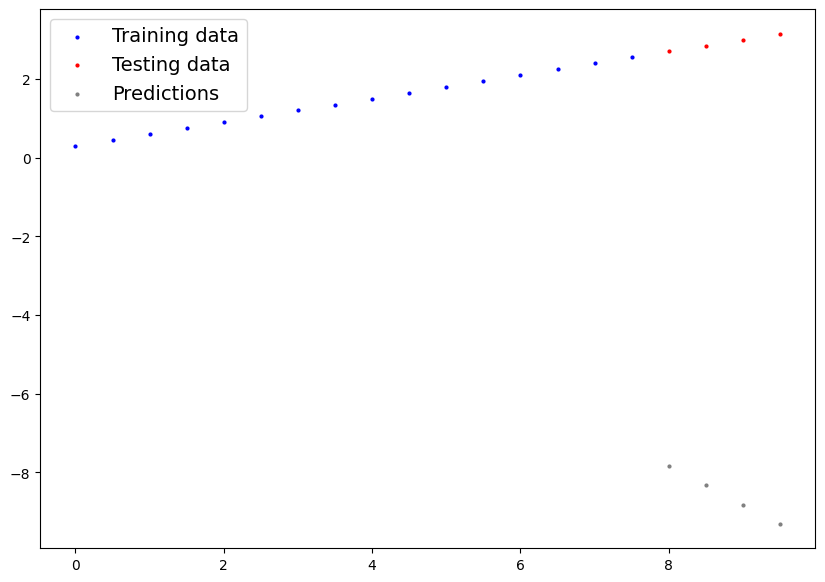

In [11]:
X_train_to_plot = X_train.tolist()
Y_train_to_plot = Y_train.tolist()      
X_test_to_plot = X_test.squeeze().tolist() 
Y_test_to_plot = Y_test.squeeze().tolist() 
predictions = Y_preds.squeeze().tolist()
print("test_data, predictions", X_test_to_plot, predictions)

plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train_to_plot, Y_train_to_plot, c="b", s=4, label="Training data")

# Plot ground truth test data in red
plt.scatter(X_test_to_plot, Y_test_to_plot, c="r", s=4, label="Testing data")

# Plot the predictions with test in grey
plt.scatter(X_test_to_plot, predictions, c="grey", s=4, label="Predictions")

plt.legend(prop={"size": 14});

In [12]:
def plot_predictions(X_train_to_plot = X_train.tolist(),
                    Y_train_to_plot = Y_train.tolist(),      
                    X_test_to_plot = X_test.squeeze().tolist(), 
                    Y_test_to_plot = Y_test.squeeze().tolist(), 
                    predictions = Y_preds.squeeze().tolist()):

    print("X_test, predictions", X_test_to_plot, predictions)
    print("Y_test, predictions", Y_test_to_plot, predictions)
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(X_train_to_plot, Y_train_to_plot, c="b", s=4, label="Training data")
    # Plot ground truth test data in red
    plt.scatter(X_test_to_plot, Y_test_to_plot, c="r", s=4, label="Testing data")
    # Plot the predictions with test in grey
    plt.scatter(X_test_to_plot, predictions, c="grey", s=4, label="Predictions")
    plt.legend(prop={"size": 14});

In [13]:
 
optimizer = torch.optim.SGD(params = regression_0.parameters(), 
                            lr = 0.01)

In [14]:
# define here so that consistent throughout and easy to change.
loss_function = nn.MSELoss() 
epochs = 500

# Create lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training
    regression_0.train()

    # 1. Forward pass using the forward() method 
    Y_pred = regression_0(X_train)
    loss = loss_function(Y_pred, Y_train)

    # 2. Backward pass 
    # Zero grad the optimizer
    optimizer.zero_grad()
    loss.backward()

    # 3. Parameter update.
    optimizer.step()

    ### Testing
    # evaluation mode
    regression_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = regression_0(X_test)
      test_loss = loss_function(test_pred, Y_test) 

      # Print every 10 steps
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MSE Train Loss: {loss} | MSE Test Loss: {test_loss} ")


Epoch: 0 | MSE Train Loss: 34.69282913208008 | MSE Test Loss: 47.226524353027344 
Epoch: 10 | MSE Train Loss: 0.0017253082478418946 | MSE Test Loss: 7.456308958353475e-05 
Epoch: 20 | MSE Train Loss: 0.0004924212698824704 | MSE Test Loss: 0.0009200205095112324 
Epoch: 30 | MSE Train Loss: 0.00044288282515481114 | MSE Test Loss: 0.0008402500534430146 
Epoch: 40 | MSE Train Loss: 0.00039836045471020043 | MSE Test Loss: 0.000755837420001626 
Epoch: 50 | MSE Train Loss: 0.0003583150391932577 | MSE Test Loss: 0.000679865013808012 
Epoch: 60 | MSE Train Loss: 0.0003222948871552944 | MSE Test Loss: 0.0006115188589319587 
Epoch: 70 | MSE Train Loss: 0.0002898970269598067 | MSE Test Loss: 0.000550042896065861 
Epoch: 80 | MSE Train Loss: 0.00026075501227751374 | MSE Test Loss: 0.0004947638371959329 
Epoch: 90 | MSE Train Loss: 0.00023454203619621694 | MSE Test Loss: 0.0004450211417861283 
Epoch: 100 | MSE Train Loss: 0.00021096592536196113 | MSE Test Loss: 0.0004002783098258078 
Epoch: 110 | MS

X_test, predictions [8.0, 8.5, 9.0, 9.5] tensor([[2.7019],
        [2.8522],
        [3.0026],
        [3.1529]])
Y_test, predictions [2.700000047683716, 2.8500001430511475, 3.0, 3.1500000953674316] tensor([[2.7019],
        [2.8522],
        [3.0026],
        [3.1529]])


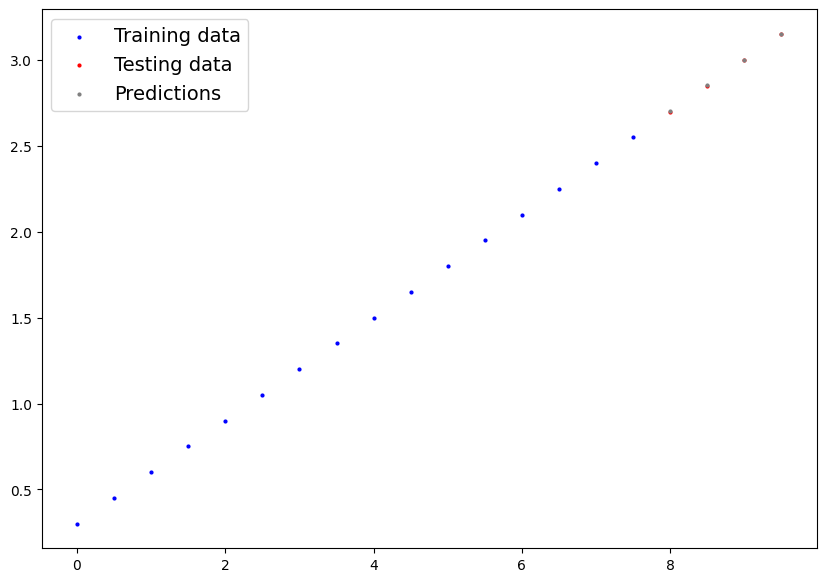

In [15]:
plot_predictions(predictions=test_pred)

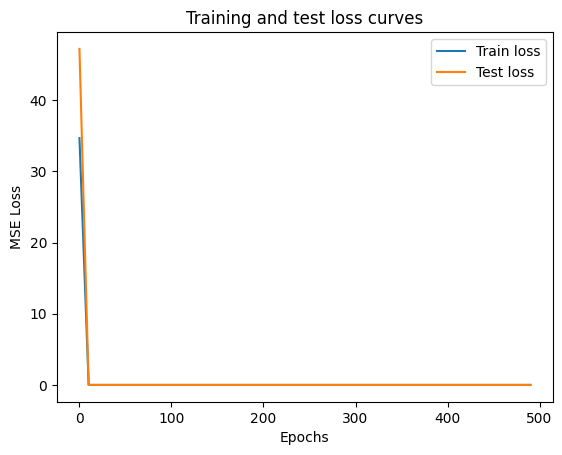

In [16]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("MSE Loss")
plt.xlabel("Epochs")
plt.legend();

In [17]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "regression_model_0.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"MODEL_SAVE_PATH: {MODEL_SAVE_PATH}")
torch.save(obj=regression_0.state_dict(), # only saving the parameters
           f=MODEL_SAVE_PATH)

MODEL_SAVE_PATH: models\regression_model_0.pt
